In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
import statsmodels.api as sm
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
b1=pd.read_csv("bankloan.csv")

In [3]:
b1=pd.DataFrame(b1)

In [4]:
b1.shape

(700, 9)

In [5]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
age         700 non-null int64
ed          700 non-null int64
employ      700 non-null int64
address     700 non-null int64
income      700 non-null int64
debtinc     700 non-null float64
creddebt    700 non-null float64
othdebt     700 non-null float64
default     700 non-null int64
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [6]:
b1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [7]:
b1.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0
4,24,2,2,0,28,17.3,1.79,3.06,1


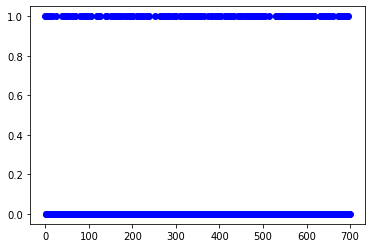

In [8]:
plt.plot(b1.default,'bo')

In [9]:
#input variables

b1_data = b1.drop(['address','ed','debtinc','employ'], 1)

In [10]:
b1_data.head(3)

,age,income,creddebt,othdebt,default
0,41,176,11.36,5.01,1
1,27,31,1.36,4.00,0
2,40,55,0.86,2.17,0


In [11]:
b1_data.shape

(700, 5)

In [19]:
X = b1_data.ix[:, (0,1,2,3)]

C:\Users\mrspider\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [20]:
# x and y

X.head()

,age,income,creddebt,othdebt
0,41,176,11.36,5.01
1,27,31,1.36,4.00
2,40,55,0.86,2.17
3,41,120,2.66,0.82
4,24,28,1.79,3.06


In [21]:
X.shape

(700, 4)

In [22]:
y = b1_data.ix[:, 4]

C:\Users\mrspider\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [23]:
y.shape

(700,)

In [24]:
y.head(3)

0    1
1    0
2    0
Name: default, dtype: int64

In [25]:
b1_data.head(3)

,age,income,creddebt,othdebt,default
0,41,176,11.36,5.01,1
1,27,31,1.36,4.00,0
2,40,55,0.86,2.17,0


In [26]:
# Training and testing data set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [27]:
len(X_train)

420

In [28]:
X_train.head(3)

,age,income,creddebt,othdebt
108,36,60,1.72,3.02
213,35,37,0.58,1.42
426,20,17,0.04,0.35


In [29]:
len(X_test)

280

In [30]:
X_test.head(3)

,age,income,creddebt,othdebt
306,36,44,0.45,6.02
604,26,29,2.53,4.93
40,23,31,0.34,1.71


In [31]:
len(y_train)

420

In [32]:
y_train.head(3)

108    0
213    1
426    0
Name: default, dtype: int64

In [33]:
len(y_test)

280

In [34]:
y_test.head(3)

306    0
604    1
40     0
Name: default, dtype: int64

In [36]:
# Buliding model on training set

#run below in bulk

svcT = svm.SVC(kernel = 'linear', 
              C = 1, gamma = 'auto',
              probability = True).fit(X_train, y_train)

In [37]:
print(svcT)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [38]:
# Do Prediction

y_pred = svcT.predict(X_test)

In [39]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [40]:
#Predicted values and classifiction matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [42]:
confusion_matrix

array([[194,  12],
       [ 60,  14]], dtype=int64)

In [44]:
# precision , recall and f1 score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       206
           1       0.54      0.19      0.28        74

    accuracy                           0.74       280
   macro avg       0.65      0.57      0.56       280
weighted avg       0.70      0.74      0.69       280



In [45]:
# Predicted probabilities
#ROC Curve

preds1 = svcT.predict_proba(X_test)[:,1]

In [47]:
print(preds1)

[0.18040936 0.59862536 0.23112757 0.75014427 0.22734422 0.1919413
 0.5        0.29189322 0.06479145 0.04291861 0.07880397 0.21173035
 0.14364499 0.17970191 0.33527464 0.09625334 0.141841   0.02970776
 0.53099129 0.07841572 0.12969806 0.5        0.21505409 0.10739367
 0.286649   0.16491239 0.27952439 0.18278308 0.59316207 0.37706494
 0.26365592 0.27357167 0.1824645  0.53678572 0.12442931 0.16274222
 0.07592093 0.43277331 0.0729331  0.34747    0.11199717 0.17855147
 0.14677197 0.08100743 0.29265149 0.36800088 0.25141243 0.12824757
 0.19337902 0.22261786 0.35918757 0.16743325 0.19954449 0.67076434
 0.28572465 0.2701514  0.1584904  0.04049805 0.44793309 0.13797264
 0.12014158 0.28245815 0.17702644 0.79503589 0.20977129 0.19689743
 0.5        0.15778049 0.22357956 0.12070354 0.17482042 0.20749536
 0.31488869 0.1757926  0.20410528 0.41783415 0.25678017 0.27171489
 0.19882062 0.25157467 0.08856244 0.5541752  0.13237128 0.30911735
 0.50739892 0.3036913  0.50540938 0.08286363 0.5237794  0.43579

In [48]:
preds1.shape

(280,)

In [50]:
# False postive rate, true postive rate and threshold

fpr1, tpr1, thresholds = metrics.roc_curve(y_test, preds1)

In [51]:
fpr1

array([0.        , 0.        , 0.        , 0.00970874, 0.00970874,
       0.01456311, 0.01456311, 0.02427184, 0.02427184, 0.02912621,
       0.02912621, 0.04368932, 0.04368932, 0.04854369, 0.04854369,
       0.0631068 , 0.0631068 , 0.07281553, 0.07281553, 0.0776699 ,
       0.0776699 , 0.08737864, 0.10194175, 0.10194175, 0.12135922,
       0.12135922, 0.15048544, 0.15048544, 0.15533981, 0.15533981,
       0.17961165, 0.17961165, 0.18446602, 0.18446602, 0.19417476,
       0.19417476, 0.20873786, 0.20873786, 0.23300971, 0.23300971,
       0.23786408, 0.23786408, 0.24271845, 0.24271845, 0.25728155,
       0.25728155, 0.29126214, 0.29126214, 0.2961165 , 0.2961165 ,
       0.30097087, 0.30097087, 0.30582524, 0.30582524, 0.41747573,
       0.41747573, 0.45145631, 0.45145631, 0.45631068, 0.45631068,
       0.48058252, 0.48058252, 0.49029126, 0.49029126, 0.49514563,
       0.49514563, 0.50485437, 0.50485437, 0.52912621, 0.52912621,
       0.55339806, 0.55339806, 0.55825243, 0.55825243, 0.58252

In [52]:
tpr1

array([0.        , 0.01351351, 0.05405405, 0.05405405, 0.06756757,
       0.06756757, 0.10810811, 0.10810811, 0.12162162, 0.12162162,
       0.16216216, 0.16216216, 0.17567568, 0.17567568, 0.18918919,
       0.18918919, 0.2027027 , 0.2027027 , 0.22972973, 0.22972973,
       0.24324324, 0.27027027, 0.27027027, 0.31081081, 0.31081081,
       0.33783784, 0.33783784, 0.36486486, 0.36486486, 0.40540541,
       0.40540541, 0.41891892, 0.41891892, 0.5       , 0.5       ,
       0.51351351, 0.51351351, 0.54054054, 0.54054054, 0.55405405,
       0.55405405, 0.56756757, 0.56756757, 0.58108108, 0.58108108,
       0.59459459, 0.59459459, 0.60810811, 0.60810811, 0.62162162,
       0.62162162, 0.63513514, 0.63513514, 0.64864865, 0.64864865,
       0.66216216, 0.66216216, 0.67567568, 0.67567568, 0.68918919,
       0.68918919, 0.7027027 , 0.7027027 , 0.72972973, 0.72972973,
       0.75675676, 0.75675676, 0.77027027, 0.77027027, 0.78378378,
       0.78378378, 0.7972973 , 0.7972973 , 0.81081081, 0.81081

In [54]:
thresholds

array([1.99998409, 0.99998409, 0.9769939 , 0.91091298, 0.90374548,
       0.88146731, 0.79503589, 0.75037972, 0.75014427, 0.74796265,
       0.64394064, 0.6269164 , 0.61056812, 0.60849355, 0.59862536,
       0.56225522, 0.55769364, 0.53678572, 0.5237794 , 0.50739892,
       0.50540938, 0.5       , 0.47100834, 0.44793309, 0.42761674,
       0.41783415, 0.37477477, 0.36861654, 0.36800088, 0.35918757,
       0.33864364, 0.33558934, 0.33527464, 0.31488869, 0.30911735,
       0.3072902 , 0.30093605, 0.29265149, 0.28572465, 0.2830342 ,
       0.28245815, 0.28154619, 0.27952439, 0.27941832, 0.27171489,
       0.2701514 , 0.25157467, 0.25141243, 0.24992396, 0.24851788,
       0.24725851, 0.24647884, 0.24590609, 0.24286111, 0.21616504,
       0.21576916, 0.21175796, 0.21173035, 0.21036935, 0.20977129,
       0.20564021, 0.2050407 , 0.20310049, 0.20151433, 0.20105695,
       0.19979849, 0.19882062, 0.19876437, 0.19337902, 0.1919413 ,
       0.18278308, 0.1824645 , 0.18163681, 0.18113372, 0.17840

In [55]:
df1 = pd.DataFrame(dict(fpr = fpr1, tpr = tpr1))

In [56]:
auc = metrics.auc(fpr1, tpr1)

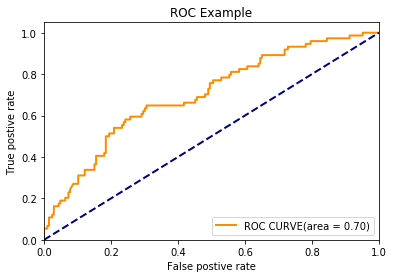

In [58]:
#ROC CURVE
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc)
plt.plot([0,1],[0,1], color = 'navy', lw= lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.title('ROC Example')
plt.legend(loc = 'lower right')
plt.show()
#run above in block

In [60]:
# PREDICTION

dataset = pd.read_csv('petrol_consumption.csv')

In [62]:
dataset = pd.DataFrame(dataset)

In [63]:
dataset.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 1.9 KB


In [65]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [66]:
# train and test data set

# prepare data for training

X = dataset.iloc[:, 0:4]

In [67]:
y = dataset.iloc[:, 4]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [70]:
len(X_test)

10

In [71]:
len(y_test)

10

In [73]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [78]:
svr_lin = SVR(kernel='linear', C=1e3)

In [79]:
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)

In [80]:
y_rbf

array([583.98421053, 583.98421053, 583.98421053, 583.98421053,
       583.98421053, 583.98421053, 583.98421053, 583.98421053,
       583.98421053, 583.98421053])

In [81]:
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)

In [82]:
y_lin

array([ 1038.72492641, -1816.52494532, -1576.31149894, -1978.31699329,
       -2275.36964828, -1339.50301891, -2891.68660551,  -485.92234045,
        2876.29470867,  3037.37511486])

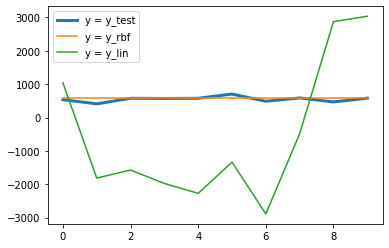

In [83]:
# look at the result

x  = np.arange(10)
x
plt.plot(x,y_test, lw = 3)
plt.plot(x, y_rbf)
plt.plot(x, y_lin)
plt.legend(['y = y_test', 'y = y_rbf', 'y = y_lin'], loc='upper left')
plt.show()